In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import itertools
import math

## Defining Problem Statement and Analyzing basic metrics

We have sells data for a black friday.
We need to analyze customer's purchase behavior / amount of purchase against gender, age, occupation, city, marital status.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Scaler Case Studies/3.Walmart/Walmart_data.csv')
print(df.columns, '\n\n')

print()
display(df.head())
print('\n\n')

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object') 





,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


We do not have any missing values in the dataset.

Also we can see that all the columns are categorical, except for the purchase.
Occupation also has around 21 unique values only, so we will treat it as categorical.

In [4]:
display(df.info())
print('\n\n')

display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


None

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


 Analyzing each variable individually to check unique values

In [5]:
# Gender analysis
print('Distinct gender values')
display(df['Gender'].value_counts().sort_values(ascending=False))
print()


# Age analysis
print('Distinct age values')
display(df['Age'].value_counts().sort_values(ascending=False))
print()


# Occupation analysis
print('Distinct occupation values')
display(df['Occupation'].value_counts().sort_values(ascending=False))
print()


# City type analysis
print('Distinct City_Category values')
display(df['City_Category'].value_counts().sort_values(ascending=False))
print()


# Stay_In_Current_City_Years
print('Distinct City_Category values')
display(df['City_Category'].value_counts().sort_values(ascending=False))
print()


# Marital_Status analysis
print('Distinct Marital_Status values')
display(df['Marital_Status'].value_counts().sort_values(ascending=False))
print()


# Product_Category analysis
print('Distinct Product_Category values')
display(df['Product_Category'].value_counts().sort_values(ascending=False))
print()

Distinct gender values


M    414259
F    135809
Name: Gender, dtype: int64


Distinct age values


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Distinct occupation values


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


Distinct City_Category values


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Distinct City_Category values


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Distinct Marital_Status values


0    324731
1    225337
Name: Marital_Status, dtype: int64


Distinct Product_Category values


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

We will check how each categorical related to number of sells

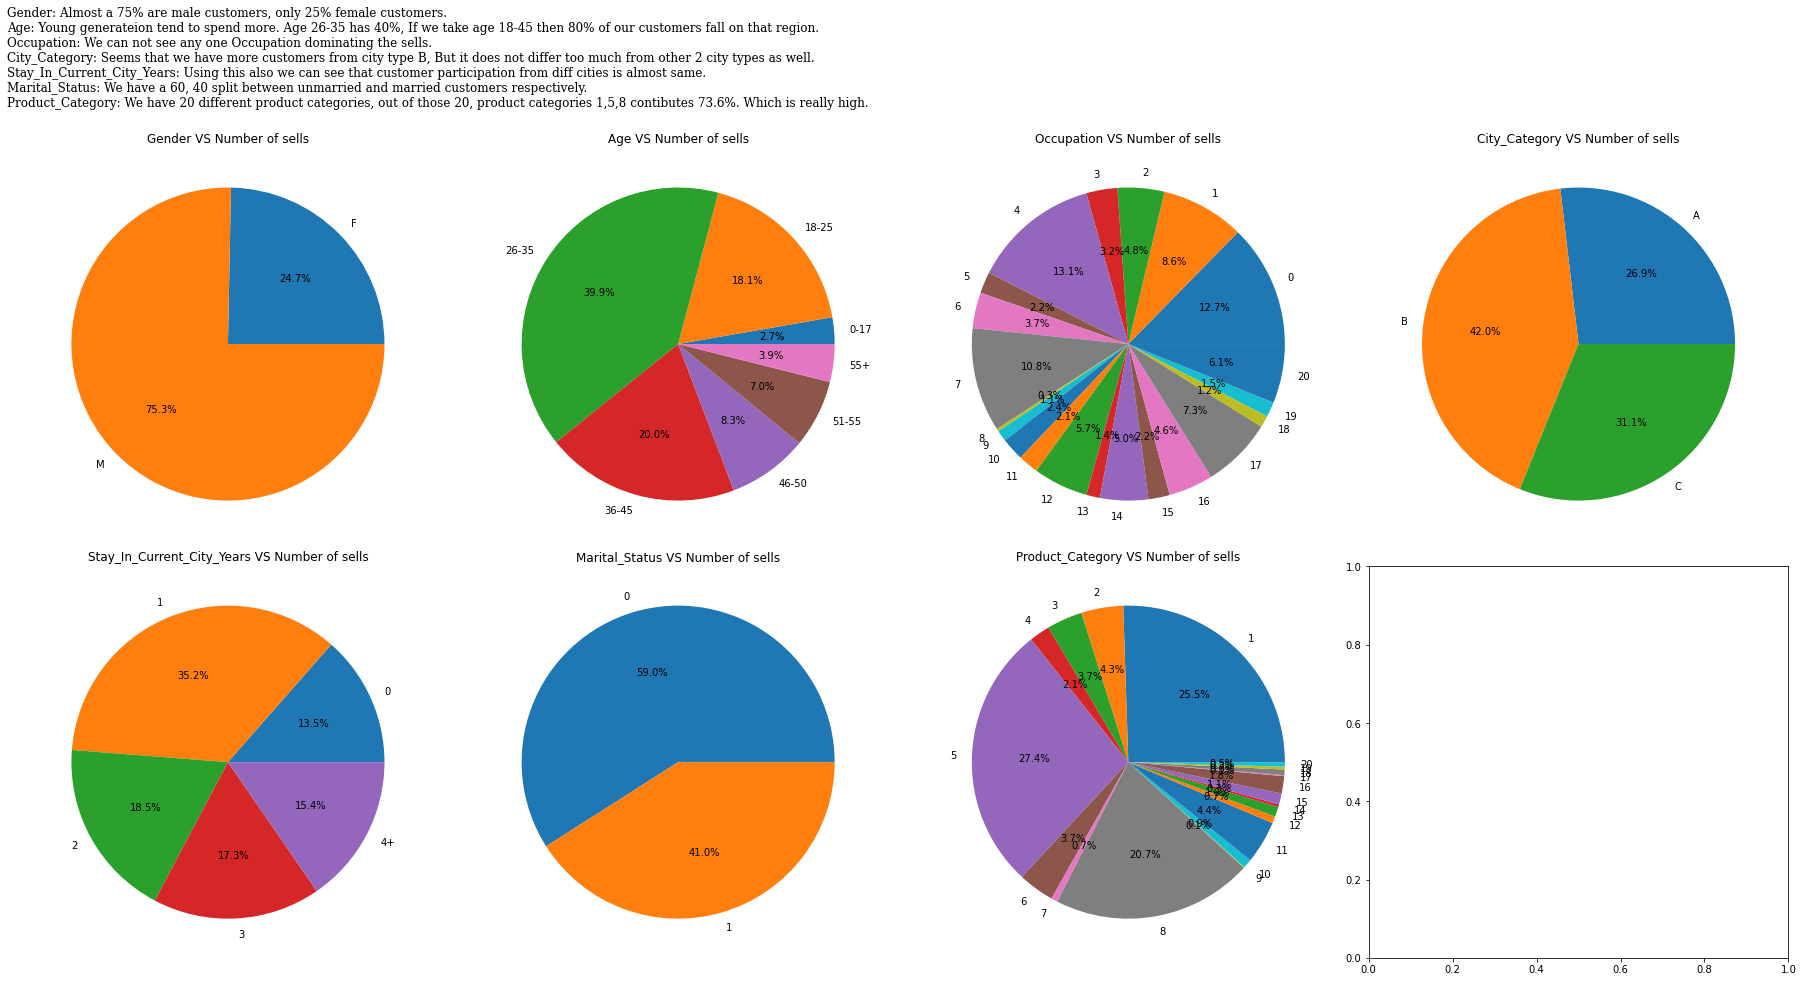

In [ ]:
# Gender Age Occupation	City_Category	Stay_In_Current_City_Years	Marital_Status	Product_Category

fig, ax = plt.subplots(2,4, figsize=(25,12))

new_df = df[['Gender']].reset_index().groupby('Gender')['index'].count().reset_index()
ax[0][0].pie(new_df['index'], labels=new_df['Gender'], autopct='%.1f%%')


new_df = df[['Age']].reset_index().groupby('Age')['index'].count().reset_index()
ax[0][1].pie(new_df['index'], labels=new_df['Age'], autopct='%.1f%%')


new_df = df[['Occupation']].reset_index().groupby('Occupation')['index'].count().reset_index()
ax[0][2].pie(new_df['index'], labels=new_df['Occupation'], autopct='%.1f%%')


new_df = df[['City_Category']].reset_index().groupby('City_Category')['index'].count().reset_index()
ax[0][3].pie(new_df['index'], labels=new_df['City_Category'], autopct='%.1f%%')


new_df = df[['Stay_In_Current_City_Years']].reset_index().groupby('Stay_In_Current_City_Years')['index'].count().reset_index()
ax[1][0].pie(new_df['index'], labels=new_df['Stay_In_Current_City_Years'], autopct='%.1f%%')


new_df = df[['Marital_Status']].reset_index().groupby('Marital_Status')['index'].count().reset_index()
ax[1][1].pie(new_df['index'], labels=new_df['Marital_Status'], autopct='%.1f%%')


new_df = df[['Product_Category']].reset_index().groupby('Product_Category')['index'].count().reset_index()
ax[1][2].pie(new_df['index'], labels=new_df['Product_Category'], autopct='%.1f%%')



ax[0][0].set_title('Gender VS Number of sells')
ax[0][1].set_title('Age VS Number of sells')
ax[0][2].set_title('Occupation VS Number of sells')
ax[0][3].set_title('City_Category VS Number of sells')

ax[1][0].set_title('Stay_In_Current_City_Years VS Number of sells')
ax[1][1].set_title('Marital_Status VS Number of sells')
ax[1][2].set_title('Product_Category VS Number of sells')



observation = '''Gender: Almost a 75% are male customers, only 25% female customers.
Age: Young generateion tend to spend more. Age 26-35 has 40%, If we take age 18-45 then 80% of our customers fall on that region.
Occupation: We can not see any one Occupation dominating the sells.
City_Category: Seems that we have more customers from city type B, But it does not differ too much from other 2 city types as well.
Stay_In_Current_City_Years: Using this also we can see that customer participation from diff cities is almost same.
Marital_Status: We have a 60, 40 split between unmarried and married customers respectively. 
Product_Category: We have 20 different product categories, out of those 20, product categories 1,5,8 contibutes 73.6%. Which is really high.
'''

fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.tight_layout()
plt.show()

## Checking Purchase distribution & Outlier analysis

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

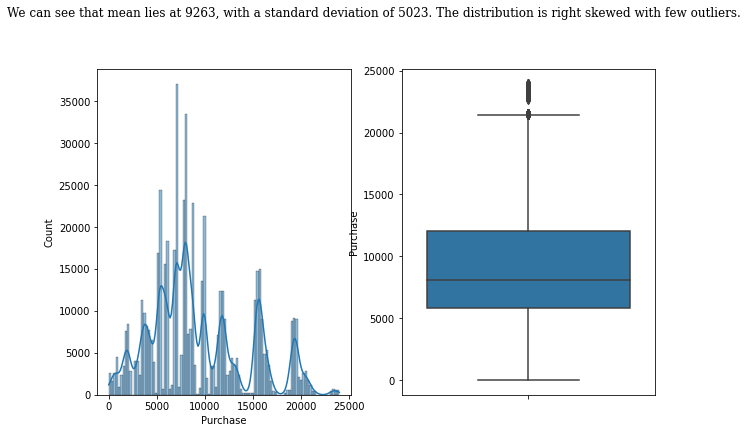

In [ ]:
display(df['Purchase'].describe())

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(x=df['Purchase'], bins=100, kde=True, ax=ax[0])

sns.boxplot(y=df['Purchase'], ax=ax[1])

observation = '''We can see that mean lies at 9263, with a standard deviation of 5023. The distribution is right skewed with few outliers.'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

 **Outlier analysis**

---
We see that we only have 3 products categories for the outlier purchase amounts, those are 10, 15, 9. It cant be just a coincidence that outliers contain only 3 type of prodcut categories out of 20. This means these 3 products are costlier, so people have to pay more for them. 

It is possible for someone to buy 23k worth of goods, which is the higest value for Purchase column. 

Final verdict:
Not removing outliers as they might have some meaning in them.

In [ ]:
q75, q25 = np.percentile(df['Purchase'], [75 ,25])

display(df[ df['Purchase'] > (q75+(1.5*(q75-q25))) ])


print(f"We see that we only have 3 products categories for the outlier purchase amounts {df[ df['Purchase'] > (q75+(1.5*(q75-q25))) ]['Product_Category'].unique()}")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


array([10, 15,  9])

## Bivariate and Univariate Graphical Analysis

##### Univariate VS Purchase Analysis

Product Category VS Purchase

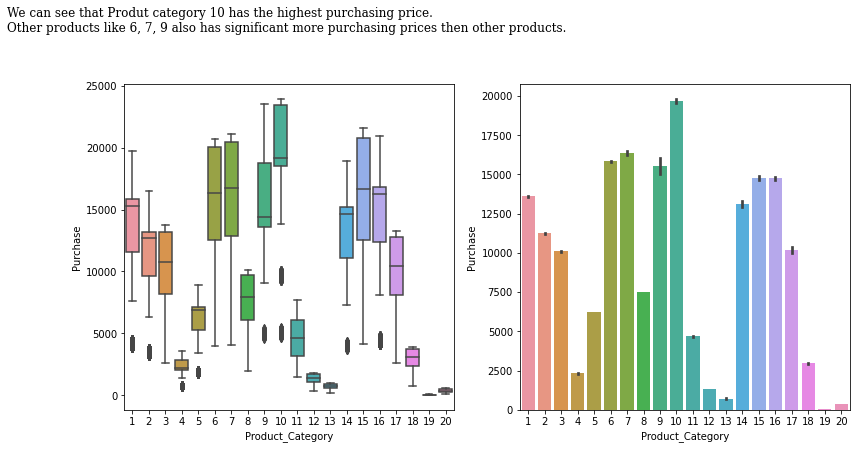

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(13,6))

sns.boxplot(data=df, y='Purchase', x='Product_Category', ax=ax[0])

sns.barplot(data=df, y='Purchase', x='Product_Category', ax=ax[1])

observation = '''We can see that Produt category 10 has the highest purchasing price. 
Other products like 6, 7, 9 also has significant more purchasing prices then other products.'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

Gender VS Purchase

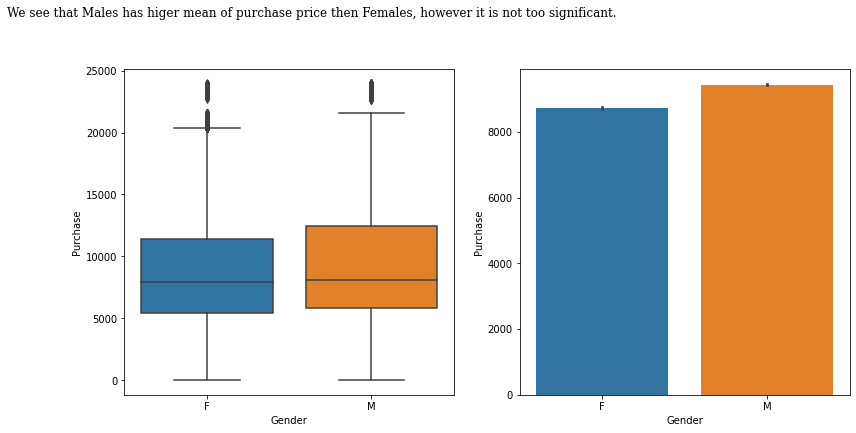

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(13,6))

sns.boxplot(data=df, y='Purchase', x='Gender', ax=ax[0])

sns.barplot(data=df, y='Purchase', x='Gender', ax=ax[1])

observation = '''We see that Males has higer mean of purchase price then Females, however it is not too significant.'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

Age VS Purchase mean

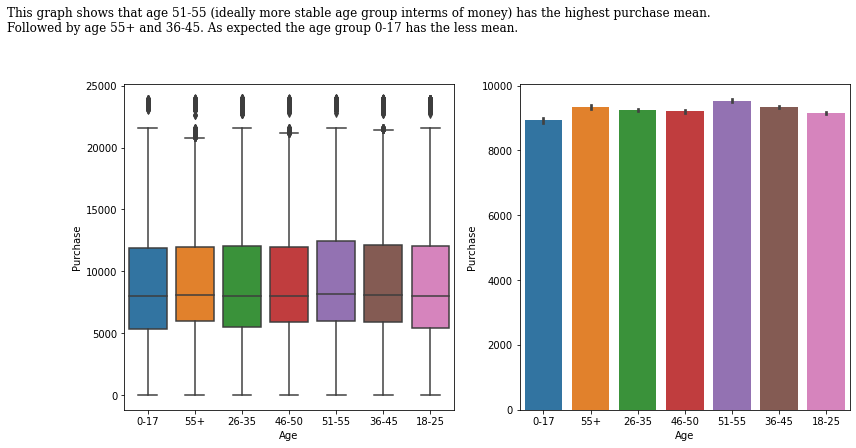

In [11]:
fig, ax = plt.subplots(1,2, figsize=(13,6))

sns.boxplot(data=df, y='Purchase', x='Age', ax=ax[0])

sns.barplot(data=df, y='Purchase', x='Age', ax=ax[1])

observation = '''This graph shows that age 51-55 (ideally more stable age group interms of money) has the highest purchase mean.
Followed by age 55+ and 36-45. As expected the age group 0-17 has the less mean.'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

City category VS Purchase mean

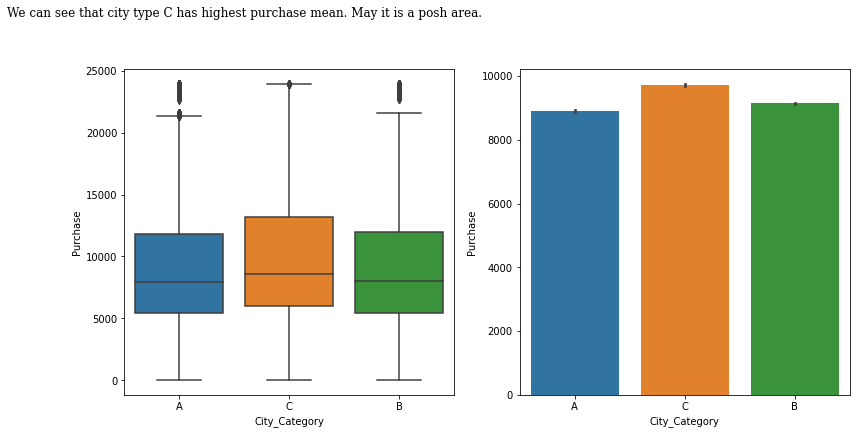

In [7]:
fig, ax = plt.subplots(1,2, figsize=(13,6))

sns.boxplot(data=df, y='Purchase', x='City_Category', ax=ax[0])

sns.barplot(data=df, y='Purchase', x='City_Category', ax=ax[1])

observation = '''We can see that city type C has highest purchase mean. May it is a posh area.'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

Stayed in city in years VS Purchase mean 

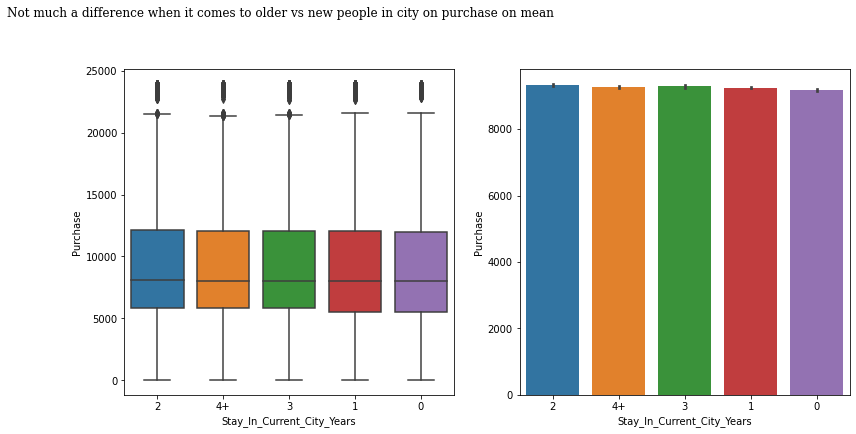

In [9]:
fig, ax = plt.subplots(1,2, figsize=(13,6))

sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', ax=ax[0])

sns.barplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', ax=ax[1])

observation = '''Not much a difference when it comes to older vs new people in city on purchase on mean'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

##### Bivariate VS Purcahse Analysis

Product Category VS Purchase Quantity for differnet Genders

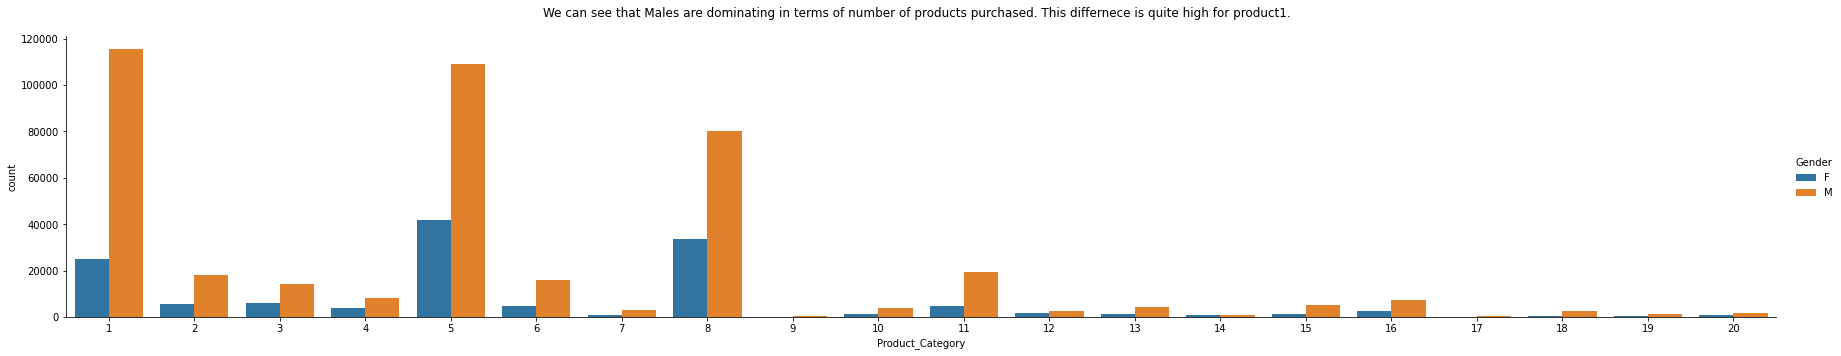

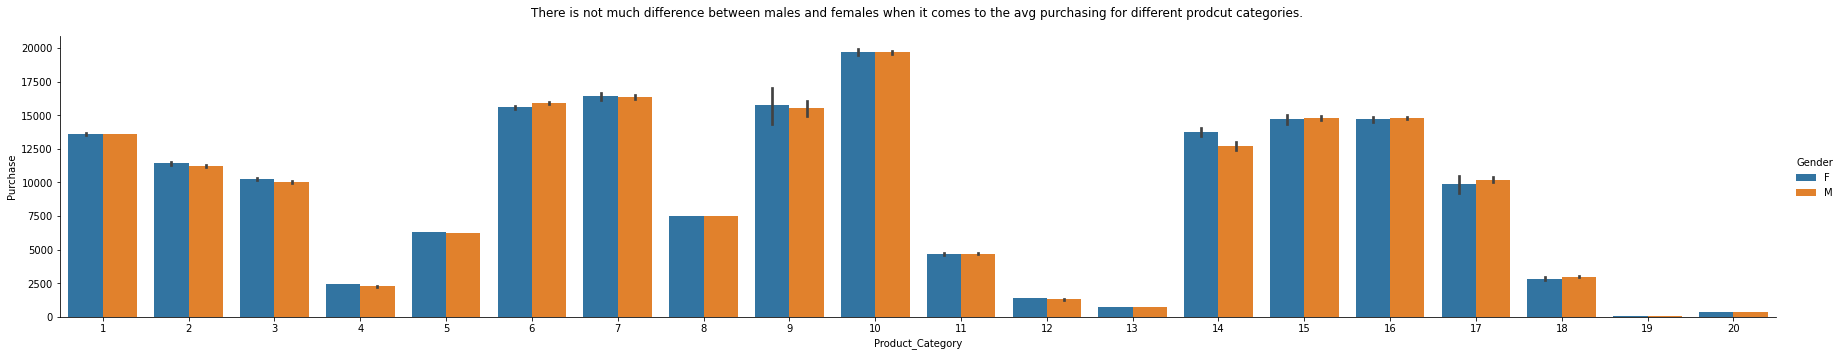

In [ ]:
cp = sns.catplot(data=df, x='Product_Category', hue='Gender', kind='count', height=5, aspect=5)
cp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cp.fig.suptitle('We can see that Males are dominating in terms of number of products purchased. This differnece is quite high for product1.')
plt.show()

cp = sns.catplot(data=df, x='Product_Category', y='Purchase', hue='Gender', kind='bar', height=5, aspect=5)
cp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cp.fig.suptitle('There is not much difference between males and females when it comes to the avg purchasing for different prodcut categories.')
plt.show()

Product Category VS Purchase Quantity for differnet Stay_In_Current_City_Years


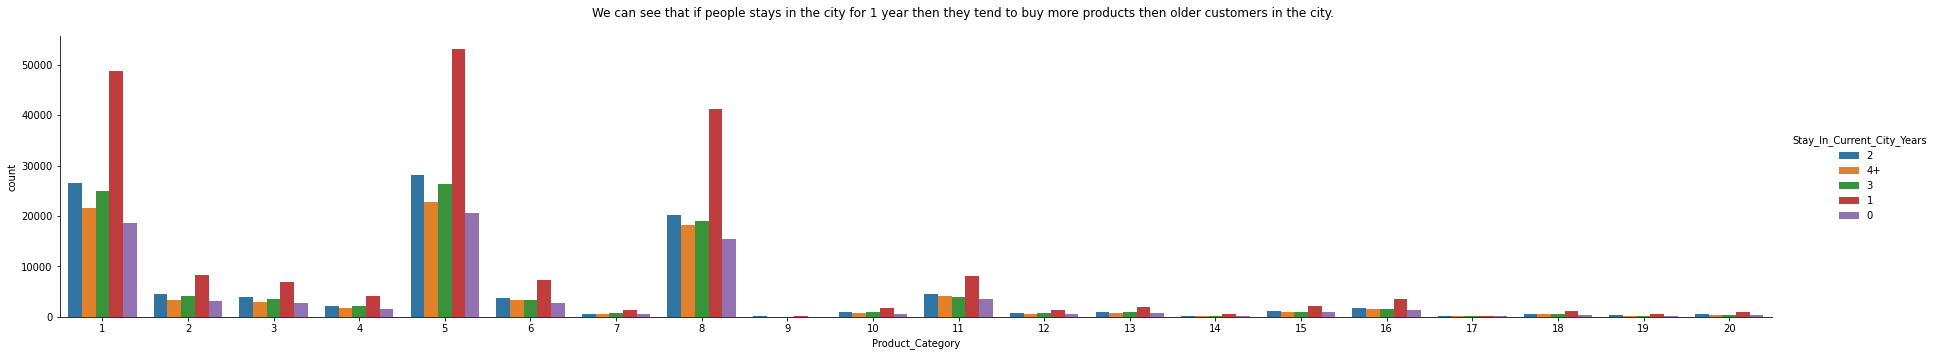

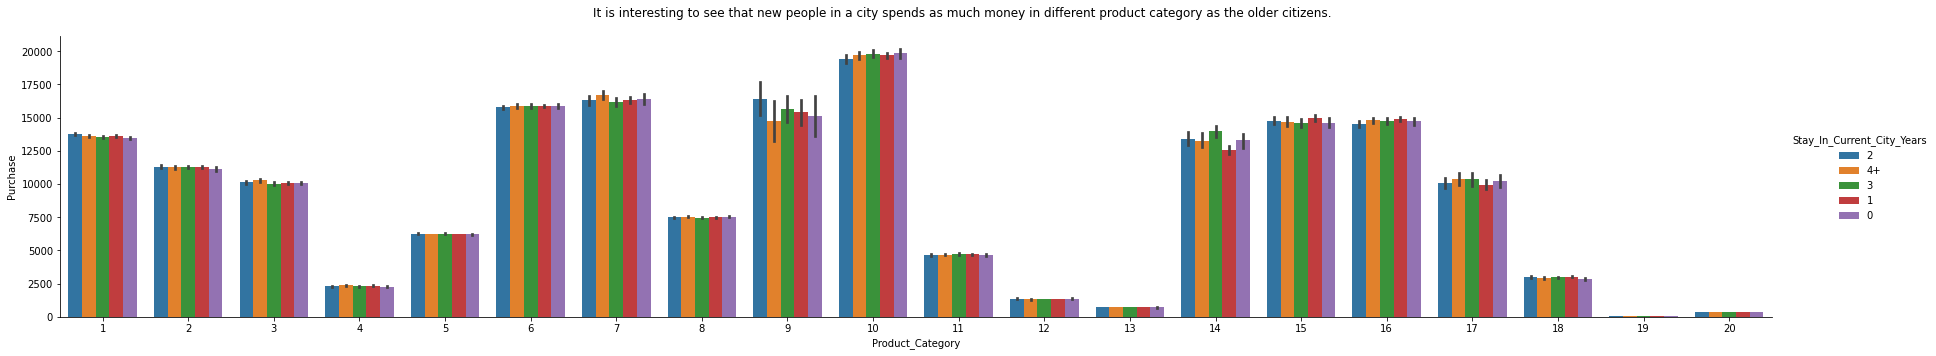

In [ ]:
cp = sns.catplot(data=df, x='Product_Category', hue='Stay_In_Current_City_Years', kind='count', height=5, aspect=5)
cp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cp.fig.suptitle('We can see that if people stays in the city for 1 year then they tend to buy more products then older customers in the city.')
plt.show()

cp = sns.catplot(data=df, x='Product_Category', y='Purchase', hue='Stay_In_Current_City_Years', kind='bar', height=5, aspect=5)
cp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cp.fig.suptitle('It is interesting to see that new people in a city spends as much money in different product category as the older citizens.')
plt.show()

Age VS Quantity Purchased for different Occupation

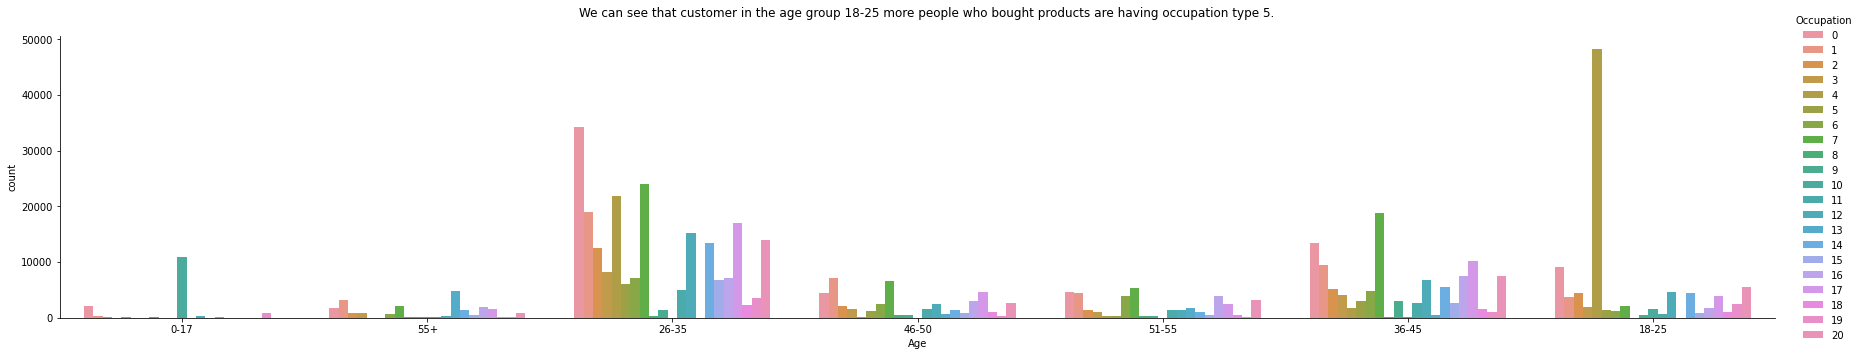

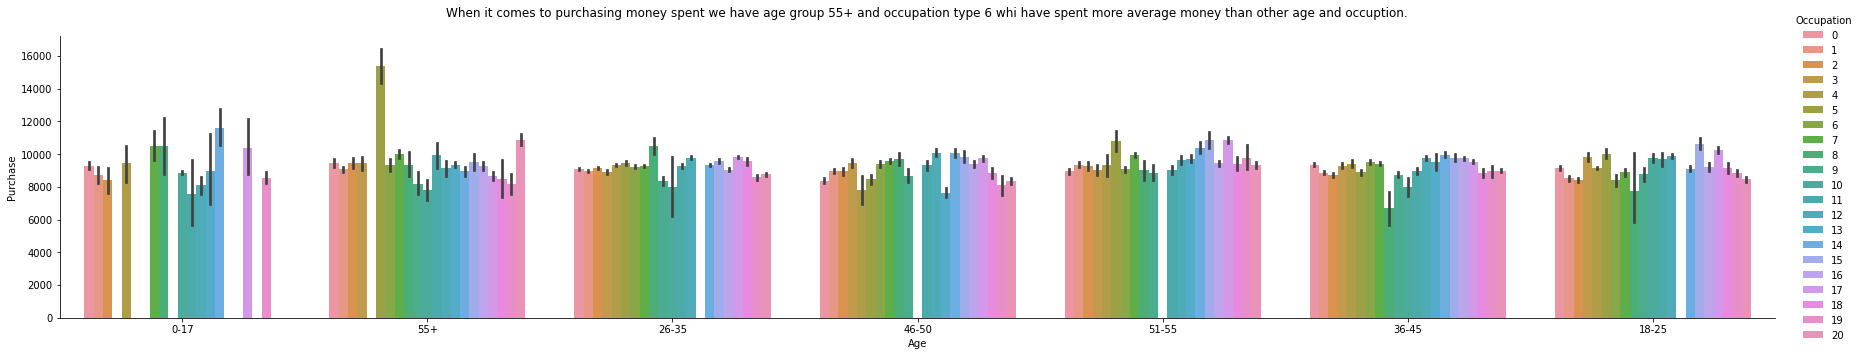

In [ ]:
cp = sns.catplot(data=df, x='Age', hue='Occupation', kind='count', height=5, aspect=5)
cp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cp.fig.suptitle('We can see that customer in the age group 18-25 more people who bought products are having occupation type 5.')
plt.show()


cp = sns.catplot(data=df, x='Age', y='Purchase', hue='Occupation', kind='bar', height=5, aspect=5)
cp.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cp.fig.suptitle('When it comes to purchasing money spent we have age group 55+ and occupation type 6 whi have spent more average money than other age and occuption.')
plt.show()

##### Correlation plot

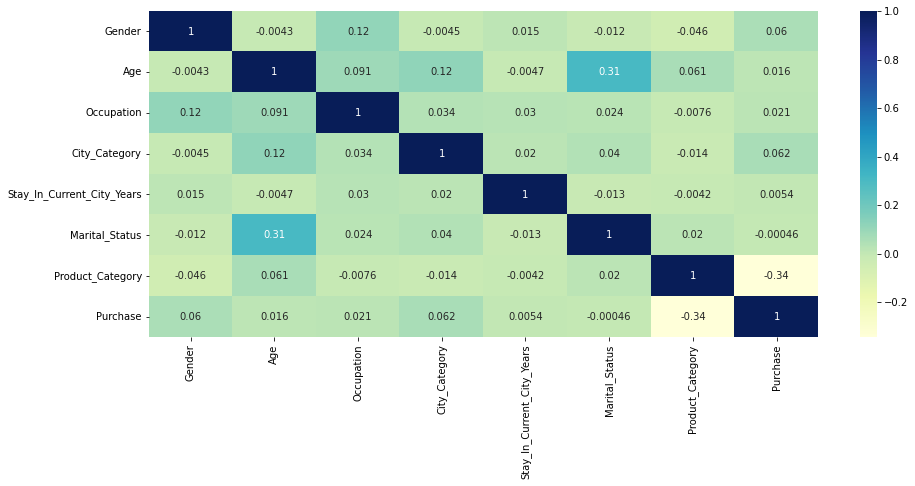

In [ ]:
# we will create copy of the original df,
# then we will map categorical values into numbers before plotting correlation

new_df = df[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']].copy()

gender_dct = {'F':0, 'M':1}
new_df['Gender'] = new_df['Gender'].replace(gender_dct)

age_dct = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
new_df['Age'] = new_df['Age'].replace(age_dct)

city_category_dct = {'A':0, 'B':1, 'C':2}
new_df['City_Category'] = new_df['City_Category'].replace(city_category_dct)

stay_in_current_city_years_dct = {'4+':4}
new_df['Stay_In_Current_City_Years'] = new_df['Stay_In_Current_City_Years'].replace(stay_in_current_city_years_dct)

new_df = new_df.astype(int)


plt.figure(figsize=(15,6))
sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Business Insights based on Non- Graphical and Visual Analysis

1) We saw that people when stay long period in a city tend to buy less products, as we have 35%, 18%, 17%, 15% customers from stay_in_current_city group 1year, 2year, 3year, 4+year respectively. This may happen cause as people get more local they tend to shop from local shops / marts.
<br>
<br>

2) We can see that customer in the age group 18-25 having occupation type 5 have the highest ever slaes. May be we could target thise people for more sales from them.
<br>
<br>

3) Purchase mean is high for city category type C, may be this is posh area. This analysis could help us in understading the geographic location of customers whose purchase mean is high.
<br>
<br>

4) We saw that age group 26-35 buys the highest number prodcuts but when it comes to spending in each transaction age group 51-55 leads.

## Answering Business Questions

1) Are women spending more money per transaction than men? Why or Why not?

Ans: We can see that women spent less money on avg then men on each transaction as their mean and median purchase amount is less than men

In [ ]:
display(df[['Gender', 'Purchase']].groupby('Gender')['Purchase'].mean())
display(df[['Gender', 'Purchase']].groupby('Gender')['Purchase'].median())

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Gender
F    7914.0
M    8098.0
Name: Purchase, dtype: float64

Confidence intervals and distribution of the mean of the expenses by female and male customers

(414259,) (135809,)


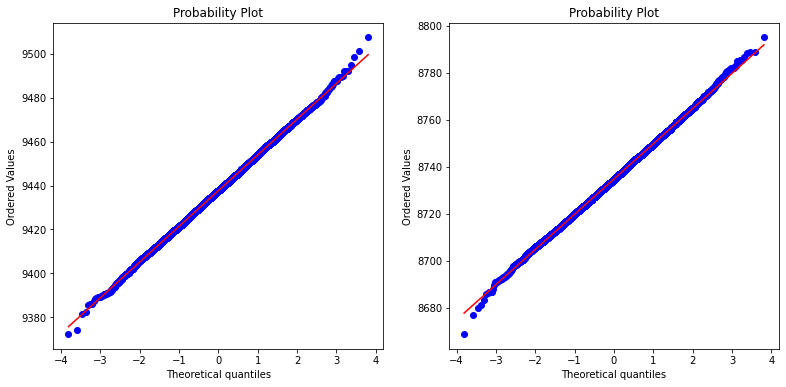




9437.647147288999 9437.526040472265 16.230447370434703 16.102887256790737
8734.783683293 8734.565765155476 14.976380457281573 15.075259829534234





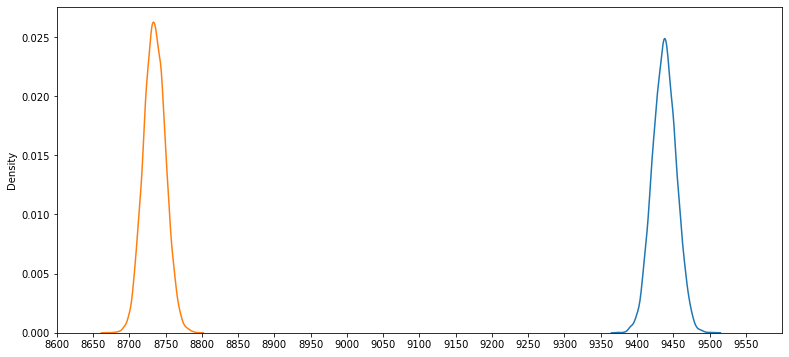

In [ ]:
male_df = df[df['Gender']=='M']['Purchase']
female_df = df[df['Gender']=='F']['Purchase']

print(male_df.shape, female_df.shape)

male_means = []
female_means = []

# we will compute 10000 means
r = 10000

# each time we will sample 100000 samples
for i in range(r):
    male_means.append(np.mean(np.random.choice(male_df, size=100000, replace=True)))

for i in range(r):
    female_means.append(np.mean(np.random.choice(female_df, size=100000, replace=True)))


#QQ-Plot to check if our sample size is enough to get a gaussian distribution of means 
fig, ax = plt.subplots(1,2, figsize=(13,6))
prob = stats.probplot(male_means, dist=stats.norm,  fit=False, plot=ax[0])
prob = stats.probplot(female_means, dist=stats.norm,  fit=False, plot=ax[1])
plt.show()

print('\n\n')
print(np.mean(male_means), np.mean(male_df), np.std(male_means), np.std(male_df)/math.sqrt(100000))
print(np.mean(female_means), np.mean(female_df), np.std(female_means), np.std(female_df)/math.sqrt(100000))
print('\n\n')


fig, ax = plt.subplots(1,1, figsize=(13,6))
sns.kdeplot(x=male_means, ax=ax, legend='here')
sns.kdeplot(x=female_means, ax=ax)
ax.set_xlim(8600, 9600)
plt.xticks(np.arange(8600, 9600, 50))
plt.show()

In [ ]:
print(f"For Males we can say with 95% confidence that the population mean(purchase mean) will lie in the range [{np.percentile(male_means, 2.5)}, {np.percentile(male_means, 97.5)}]")
print(f"For Females we can say with 95% confidence that the population mean(purchase mean) will lie in the range [{np.percentile(female_means, 2.5)}, {np.percentile(female_means, 97.5)}]")

For Males we can say with 95% confidence that the population mean(purchase mean) will lie in the range [9406.39564075, 9469.471496]
For Females we can say with 95% confidence that the population mean(purchase mean) will lie in the range [8706.24046375, 8764.294167]


2) Are married people spending more money per transaction than Unmarried? Why or Why not?

Ans: We can see that there is not much of a differnece between transaction per purchase for married and :unmarried people.

In [ ]:
display(df[['Marital_Status', 'Purchase']].groupby('Marital_Status')['Purchase'].mean().sort_values(ascending=False))
display(df[['Marital_Status', 'Purchase']].groupby('Marital_Status')['Purchase'].median().sort_values(ascending=False))

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

Marital_Status
1    8051.0
0    8044.0
Name: Purchase, dtype: float64

(324731,) (225337,)


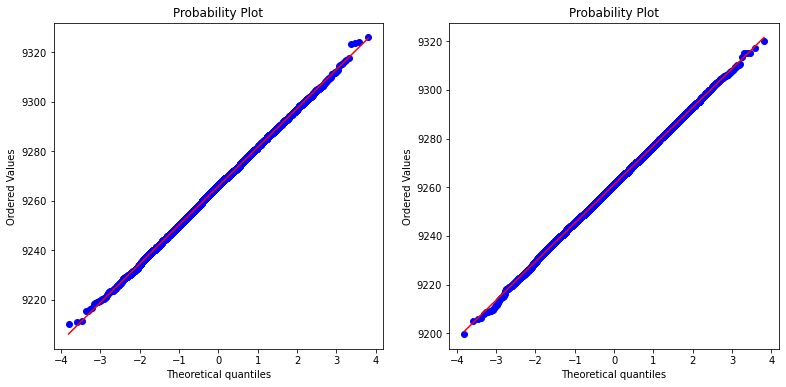




9265.996279887999 9265.907618921507 15.686022148258427 15.897845344840777
9261.134614782 9261.174574082374 15.839331306230823 15.864787298677792





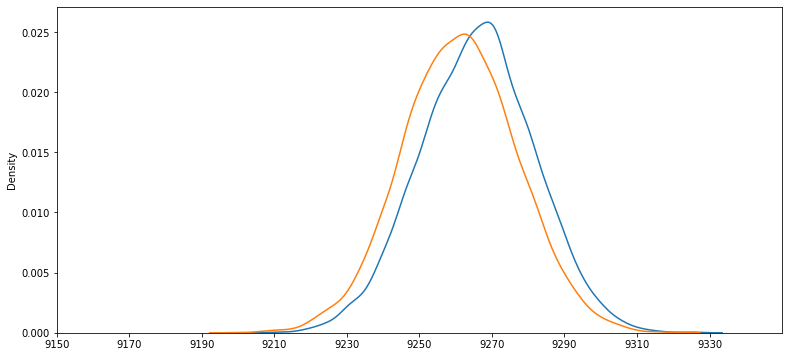

In [ ]:
married_df = df[df['Marital_Status']==0]['Purchase']
unmarried_df = df[df['Marital_Status']==1]['Purchase']

print(married_df.shape, unmarried_df.shape)

married_means = []
unmarried_means = []

# we will compute 10000 means
r = 10000

# each time we will sample 100000 samples
for i in range(r):
    married_means.append(np.mean(np.random.choice(married_df, size=100000, replace=True)))

for i in range(r):
    unmarried_means.append(np.mean(np.random.choice(unmarried_df, size=100000, replace=True)))


#QQ-Plot to check if our sample size is enough to get a gaussian distribution of means 
fig, ax = plt.subplots(1,2, figsize=(13,6))
prob = stats.probplot(married_means, dist=stats.norm,  fit=False, plot=ax[0])
prob = stats.probplot(unmarried_means, dist=stats.norm,  fit=False, plot=ax[1])
plt.show()

print('\n\n')
print(np.mean(married_means), np.mean(married_df), np.std(married_means), np.std(married_df)/math.sqrt(100000))
print(np.mean(unmarried_means), np.mean(unmarried_df), np.std(unmarried_means), np.std(unmarried_df)/math.sqrt(100000))
print('\n\n')


fig, ax = plt.subplots(1,1, figsize=(13,6))
sns.kdeplot(x=married_means, ax=ax, legend='here')
sns.kdeplot(x=unmarried_means, ax=ax)
ax.set_xlim(9150, 9350)
plt.xticks(np.arange(9150, 9350, 20))
plt.show()

In [ ]:
print(f"For Married 95% confidence in the range [{np.percentile(married_means, 2.5)}, {np.percentile(married_means, 97.5)}]")
print(f"For Females 95% confidence in the range [{np.percentile(unmarried_means, 2.5)}, {np.percentile(unmarried_means, 97.5)}]")

print('As these confidence intervals are over lapping we cant distinguish the means distributions')

For Married 95% confidence in the range [9235.02090125, 9296.41375125]
For Females 95% confidence in the range [9230.1960025, 9292.38419075]
As these confidence intervals are over lapping we cant distinguish the means distributions


3) Which Age group has the maximum mean purchase amount?

In [ ]:
display(df[['Age', 'Purchase']].groupby('Age')['Purchase'].mean().sort_values(ascending=False))
display(df[['Age', 'Purchase']].groupby('Age')['Purchase'].median().sort_values(ascending=False))

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

Age
51-55    8130.0
55+      8105.5
36-45    8061.0
46-50    8036.0
26-35    8030.0
18-25    8027.0
0-17     7986.0
Name: Purchase, dtype: float64

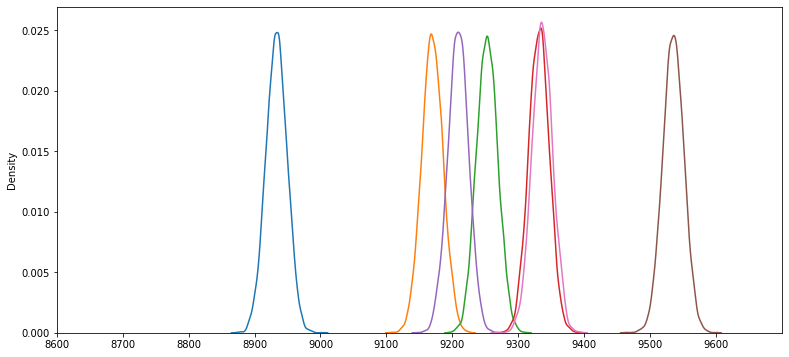

In [ ]:
age_17_df = df[df['Age']=='0-17']['Purchase']
age_25_df = df[df['Age']=='18-25']['Purchase']
age_35_df = df[df['Age']=='26-35']['Purchase']
age_45_df = df[df['Age']=='36-45']['Purchase']
age_50_df = df[df['Age']=='46-50']['Purchase']
age_55_df = df[df['Age']=='51-55']['Purchase']
age_55_plus_df = df[df['Age']=='55+']['Purchase']

age_17_means = []
age_25_means = []
age_35_means = []
age_45_means = []
age_50_means = []
age_55_means = []
age_55_plus_means = []


# we will compute 10000 means
r = 10000

# each time we will sample 100000 samples
for i in range(r):
    age_17_means.append(np.mean(np.random.choice(age_17_df, size=100000, replace=True)))

for i in range(r):
    age_25_means.append(np.mean(np.random.choice(age_25_df, size=100000, replace=True)))

for i in range(r):
    age_35_means.append(np.mean(np.random.choice(age_35_df, size=100000, replace=True)))

for i in range(r):
    age_45_means.append(np.mean(np.random.choice(age_45_df, size=100000, replace=True)))

for i in range(r):
    age_50_means.append(np.mean(np.random.choice(age_50_df, size=100000, replace=True)))

for i in range(r):
    age_55_means.append(np.mean(np.random.choice(age_55_df, size=100000, replace=True)))

for i in range(r):
    age_55_plus_means.append(np.mean(np.random.choice(age_55_plus_df, size=100000, replace=True)))



fig, ax = plt.subplots(1,1, figsize=(13,6))

sns.kdeplot(x=age_17_means, ax=ax)
sns.kdeplot(x=age_25_means, ax=ax)
sns.kdeplot(x=age_35_means, ax=ax)
sns.kdeplot(x=age_45_means, ax=ax)
sns.kdeplot(x=age_50_means, ax=ax)
sns.kdeplot(x=age_55_means, ax=ax)
sns.kdeplot(x=age_55_plus_means, ax=ax)

ax.set_xlim(8600, 9700)
plt.xticks(np.arange(8600, 9700, 100))
plt.show()

In [ ]:
print(f"For Age group 0-17 the 95% confidence in the range [{np.percentile(age_17_means, 2.5)}, {np.percentile(age_17_means, 97.5)}]")
print(f"For Age group 18-25 the 95% confidence in the range [{np.percentile(age_25_means, 2.5)}, {np.percentile(age_25_means, 97.5)}]")
print(f"For Age group 26-35 the 95% confidence in the range [{np.percentile(age_35_means, 2.5)}, {np.percentile(age_35_means, 97.5)}]")
print(f"For Age group 36-45 the 95% confidence in the range [{np.percentile(age_45_means, 2.5)}, {np.percentile(age_45_means, 97.5)}]")
print(f"For Age group 46-50 the 95% confidence in the range [{np.percentile(age_50_means, 2.5)}, {np.percentile(age_50_means, 97.5)}]")
print(f"For Age group 50-55 the 95% confidence in the range [{np.percentile(age_55_means, 2.5)}, {np.percentile(age_55_means, 97.5)}]")
print(f"For Age group 55+ the 95% confidence in the range [{np.percentile(age_55_plus_means, 2.5)}, {np.percentile(age_55_plus_means, 97.5)}]")

print('For age groups 0-17 and 50-55 we can clearly separet the purchase population means')

For Age group 0-17 the 95% confidence in the range [8901.80587525, 8964.4055115]
For Age group 18-25 the 95% confidence in the range [9138.249945500002, 9201.417981999999]
For Age group 26-35 the 95% confidence in the range [9222.06925825, 9284.159835749999]
For Age group 36-45 the 95% confidence in the range [9300.766120749999, 9362.04262475]
For Age group 46-50 the 95% confidence in the range [9177.44063375, 9239.15523625]
For Age group 50-55 the 95% confidence in the range [9503.92538225, 9566.3208545]
For Age group 55+ the 95% confidence in the range [9305.49719125, 9367.22388225]
For age groups we can clearly separet the purchase population means


## Final Insights from CLT

1) We found with 95% confidence that males are having mean purchase more than females by almost 700 bucks.
<br>
<br>

2) For unmarried and married people the purchase mean is almost same as the 95% confidence interval for both of them overlaps.
<br>
<br>

3) For differnet age group we found that 95% confidence population purchase mean increases as the age increases, with two exception that 46-50, 55+.

Also we have some overlaps between age groups.

some age groups can be separated out, those are 0-17 and 50-55.

## Recommendations for business

1) Could try giving discounts for females or female products to improve their participation in the sales, hence increasing their mean purchasing amount.
<br>
<br>

2) Both married and unmarried couple, has almost same purchasing mean. However we have 60% of unmarried customers and 40% married customers. We can surely look into for the improvement in participation of married people.
<br>
<br>

3) From the CLT computation we saw that as the age increases the purchasing means also increases. 
However we have 2 age groups for which it does not hold true. Those are 46-50, 55+. 

For 46-50 we can try promoting more, may be we could give discounts on some credit cards as these people are generally the age group having credit cards and jobs.

same for the group young group 0-17, we could use social media to promote for them.
<br>
<br>

4) We saw that older people in the city tend to buy less products, after they spent 1 year the purchase rate decreases, may be cause they are aware of local shops / marts. For this Walmart should try to retain customers. May be some special treatments for loyal and older customers.
<br>
<br>

5) Product category 10 has higest avg purchasing price, followed by 6, 7, 9.
But if we see the % of sales for these products category are very low.

For category 10, 6, 7, 9 we have sales 0.9%, 3.7%, 0.7%, 0.1% respectively.
So we need to increase the sales of these product categories which could increase our overall revenue. 